<a href="https://colab.research.google.com/github/Sand08/Statistics-and-Machine-Learning/blob/main/SML_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset using sklearn
iris = load_iris()

# Convert the dataset to a pandas DataFrame
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) as a column to the DataFrame
iris_data['species'] = iris.target

# Mapping species to their actual names
iris_data['species'] = iris_data['species'].map(dict(enumerate(iris.target_names)))

# Display the first few rows of the dataset to confirm it loaded correctly
iris_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**T-Test**

T-Test: Comparing Mean Petal Lengths of Setosa vs. Versicolor
T-Statistic: -39.49
P-Value: 0.000
Reject the null hypothesis: The mean petal lengths of Setosa and Versicolor are significantly different.


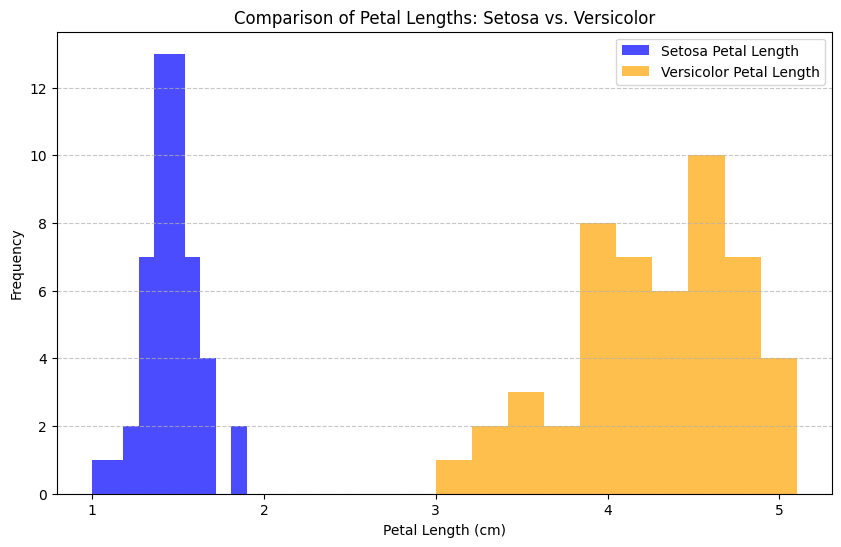

In [3]:
from scipy.stats import ttest_ind

# Extract petal length data for Setosa and Versicolor species
setosa_petal_length = iris_data[iris_data['species'] == 'setosa']['petal length (cm)']
versicolor_petal_length = iris_data[iris_data['species'] == 'versicolor']['petal length (cm)']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(setosa_petal_length, versicolor_petal_length, equal_var=False)

# Print the results
print("T-Test: Comparing Mean Petal Lengths of Setosa vs. Versicolor")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.3f}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: The mean petal lengths of Setosa and Versicolor are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the mean petal lengths of Setosa and Versicolor.")


import matplotlib.pyplot as plt

# Plot the distribution of petal lengths for Setosa and Versicolor
plt.figure(figsize=(10, 6))

# Histogram for Setosa
plt.hist(setosa_petal_length, bins=10, alpha=0.7, color='blue', label='Setosa Petal Length')

# Histogram for Versicolor
plt.hist(versicolor_petal_length, bins=10, alpha=0.7, color='orange', label='Versicolor Petal Length')

# Add titles and labels
plt.title('Comparison of Petal Lengths: Setosa vs. Versicolor')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.legend()

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


**Null Hypothesis**

The mean petal lengths of Setosa and Versicolor are equal.

**T-Test Results**


Measures the size of the difference between the means relative to the variability in the data.

**P-Value:**
If
p<0.05, reject the null hypothesis, indicating a significant difference between the means.

**Z-Test**

Z-Test: Test if mean sepal length of Setosa equals 5.0
Z-Statistic: 0.12
P-Value: 0.904
Fail to reject the null hypothesis: No significant difference from 5.0.


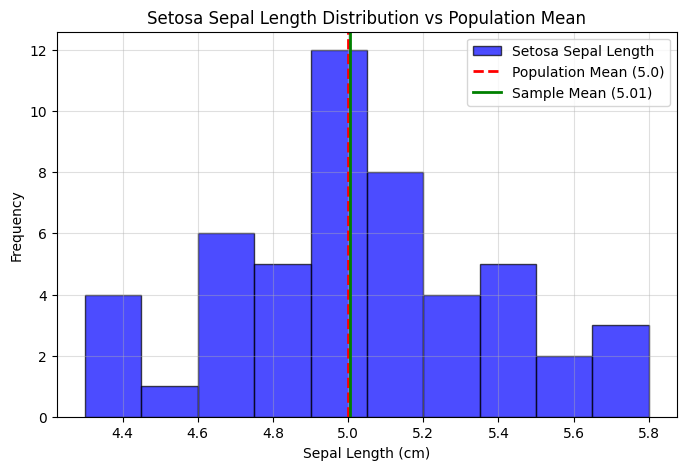

In [4]:
import numpy as np
from scipy.stats import norm

# Null Hypothesis: Mean Sepal Length = 5.0
population_mean = 5.0

# Extract sepal length data for Setosa species
setosa_sepal_length = iris_data[iris_data['species'] == 'setosa']['sepal length (cm)']

# Calculate the sample mean and sample standard deviation
sample_mean = np.mean(setosa_sepal_length)
sample_std = np.std(setosa_sepal_length, ddof=1)  # Sample standard deviation
n = len(setosa_sepal_length)  # Sample size

# Calculate the Z-statistic
z_stat = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Calculate the p-value for the two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# Print the results
print("Z-Test: Test if mean sepal length of Setosa equals 5.0")
print(f"Z-Statistic: {z_stat:.2f}")
print(f"P-Value: {p_value:.3f}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: The mean sepal length of Setosa is significantly different from 5.0.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 5.0.")


import matplotlib.pyplot as plt

# Plot the sample distribution vs population mean
plt.figure(figsize=(8, 5))
plt.hist(setosa_sepal_length, bins=10, alpha=0.7, color='blue', edgecolor='black', label='Setosa Sepal Length')
plt.axvline(population_mean, color='red', linestyle='--', linewidth=2, label=f'Population Mean ({population_mean})')
plt.axvline(sample_mean, color='green', linestyle='-', linewidth=2, label=f'Sample Mean ({sample_mean:.2f})')
plt.title('Setosa Sepal Length Distribution vs Population Mean')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(alpha=0.4)
plt.show()


**Z-Test for Mean Sepal Length**

**Null Hypothesis**

The mean sepal length of the Setosa species equals 5.0.



If
p<0.05:
Reject
 : The mean sepal length is significantly different from 5.0.

If
p≥0.05:
Fail to reject
 : No significant evidence to conclude the mean differs from 5.0.

 **Histogram**


If the green line (sample mean) is close to the red line (population mean), the Z-statistic will be small, and the null hypothesis may not be rejected.
Significant separation between the two lines suggests the sample mean is unlikely under the null hypothesis.

F-Statistic: 960.01, P-Value: 0.000
Reject the null hypothesis: At least one species has a significantly different mean petal width.


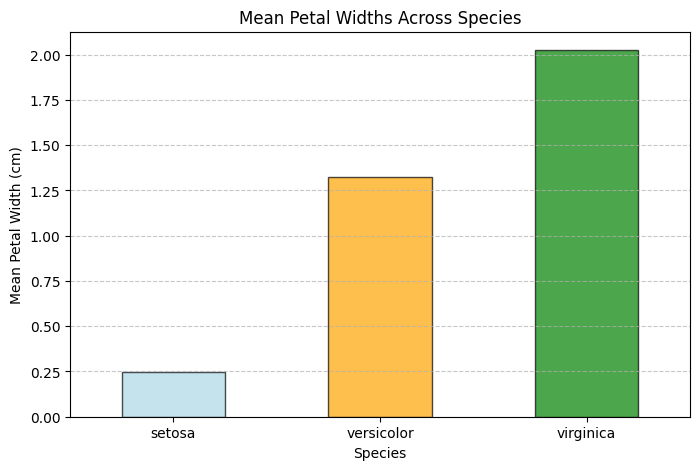

In [5]:
from scipy.stats import f_oneway

# Extract petal width data for each species
setosa_petal_width = iris_data[iris_data['species'] == 'setosa']['petal width (cm)']
versicolor_petal_width = iris_data[iris_data['species'] == 'versicolor']['petal width (cm)']
virginica_petal_width = iris_data[iris_data['species'] == 'virginica']['petal width (cm)']

# Perform one-way ANOVA
f_stat, p_value_anova = f_oneway(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

# Print results
print(f"F-Statistic: {f_stat:.2f}, P-Value: {p_value_anova:.3f}")
if p_value_anova < 0.05:
    print("Reject the null hypothesis: At least one species has a significantly different mean petal width.")
else:
    print("Fail to reject the null hypothesis: All species have similar mean petal widths.")

# Simpler visualization using a bar chart for mean petal widths
species_means = iris_data.groupby('species')['petal width (cm)'].mean()

# Bar chart for mean petal widths across species
plt.figure(figsize=(8, 5))
species_means.plot(kind='bar', color=['lightblue', 'orange', 'green'], edgecolor='black', alpha=0.7)
plt.title('Mean Petal Widths Across Species')
plt.xlabel('Species')
plt.ylabel('Mean Petal Width (cm)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**ANOVA**

F-Statistic: 960.01 P-Value: 0.000

**Decision**: Reject the null hypothesis, indicating significant differences in mean petal widths among species.

The bar chart provides a simple and clear visualization of the mean petal widths across the three species:

Setosa: Smallest mean petal width.
Versicolor: Intermediate mean petal width.
Virginica: Largest mean petal width.

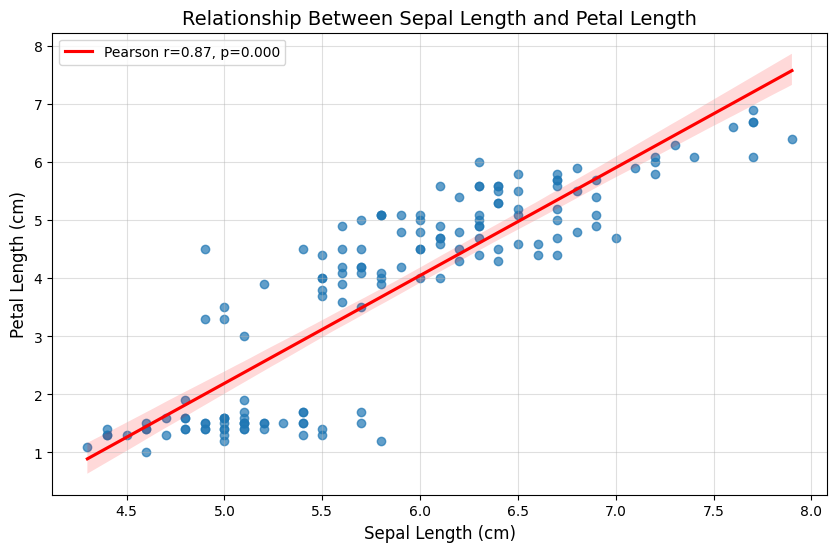

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = stats.pearsonr(iris_data['sepal length (cm)'], iris_data['petal length (cm)'])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='sepal length (cm)',
    y='petal length (cm)',
    data=iris_data,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red', 'label': f'Pearson r={correlation:.2f}, p={p_value:.3f}'}
)

# Customize plot
plt.title('Relationship Between Sepal Length and Petal Length', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(alpha=0.4)

# Show plot
plt.show()



**Correlation / Regression**

The scatter plot visualizes the relationship between sepal length and petal length for the Iris dataset:

**Observation**:
A clear positive correlation is evident: as sepal length increases, petal length tends to increase as well. This suggests a proportional relationship between these two attributes.

Positive Correlation:

If
r>0, as sepal length increases, petal length also tends to increase.

Strength of Correlation:
Values close to +1 or -1 indicate a strong relationship.

r≈0 suggests no linear relationship.